# Homework 3 - Probability Estimation

### Importing Packages

In [2]:
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package

## Setup matplotlib to output figures into the notebook
%matplotlib inline

## Set some default values of the the matplotlib plots
plt.rcParams['figure.figsize'] = (6.0, 6.0)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## The Ultra-Trail du Mont-Blanc

In this assignment, we will examine the distribution of results in The Ultra-Trail du Mont-Blanc race.

The description of the race (taken from Wikipedia):

>  It takes place once a year on either the last weekend in August or the first weekend of September in the Alps, and follows the route of the Tour du Mont Blanc through France, Italy and Switzerland. It has a distance of approximately 171 kilometres (106 mi), and a total elevation gain of around 10,040 metres (32,940 ft). It is widely regarded as one of the most difficult foot races in the world, and one of the largest with more than 2,500 starters. It is one race during a week-long festival based around Chamonix in France. The races have strict entry and qualification requirements attained by accumulating enough race points through qualifying trail races over the previous two-year period. In 2016 and 2017, 42% and 34% of runners did not finish the UTMB race.

> While the best runners complete the loop in slightly more than 20 hours, most runners take 32 to 46 hours to reach the finish line. Most runners will have to run through two nights in order to complete the race.

The original results can be found [here](https://utmbmontblanc.com/en/page/349/results.html).

A processed version of the results as a CSV file can be found [here](https://technion046195.netlify.app/datasets/utmb.csv)

### Loading the dataset

In [3]:
data_file = 'https://technion046195.netlify.app/datasets/utmb.csv'

## Loading the data
dataset = pd.read_csv(data_file)

dataset

,Rank,Name,Year,Result,Age Group,Gender
0,1,DELEBARRE Vincent,2004,21.105000,1,0
1,2,SHERPA Dachhiri-Dawa,2004,23.041111,1,0
2,3,PACHE Jean Claude,2004,23.668889,1,0
3,4,FAVRE-FELIX Lionel,2004,23.843333,1,0
4,5,NEMETH Csaba,2004,23.902500,1,0
...,...,...,...,...,...,...
19511,1774,BIAUNIÉ Jean-Marie,2018,46.552500,3,0
19512,1775,MUIRHEAD Lorna,2018,46.591111,2,1
19513,1776,YAMANE Satoshi,2018,46.911944,2,0
19514,1777,SCHUHMANN Marc,2018,46.941667,3,0


### The Data Fields and Types

This dataset contains the results for all the runners which finished the race over all the years in which the race took place. The data fields (the columns) for each runner are as following:

- **Name**: The runner's name.
- **Year**: The year of the race.
- **Result**: The runner's result (the time it took him to finish the race) in hours. The race ends after about 47 hours. Therefore, these results are between 0 and 47.
- **Age group**: The age group to which the runner belongs to: 0 - the youngest (10-22) and 6 - The oldest (80+)
- **Gender**: The runner's gender: 0-male, 1-female.
- **Rank**: The overall score rank of the runner in that specific year.

To extract a column from the DataFrame as a NumPy array we can use the following code:

### ✍️ The == operator

Correct the code below so that it will count and print the number of runners which have finished the race in 2014.
- Use the equality operator "a==b" to create a boolean 1D array.
- Use the summation function *np.sum(x)* to sum over the values of the array.

In [15]:
## Define the array of the years:
years = dataset['Year'].values
print(years)
           
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
## Correct the following line:
## Example: the number of runners which have finished the race since 2010 would be: np.sum(x > 2010)
number_of_runners_in_2014 = np.sum(1*(years==2014))
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

print('The number of runners which finished the race in 2014: ' + str(number_of_runners_in_2014))

[2004 2004 2004 ... 2018 2018 2018]
The number of runners which finished the race in 2014: 1582


### ✍️ The & operator

Correct the code below so that it will count and print the number of **male** runners which have finished the race in 2014.
- Use the logical AND operator "a & b" two combine two boolean arrays

In [30]:
## Define the array of the genders:
genders = dataset['Gender'].values

## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
## Fill in the following line:
number_of_male_runners_in_2014 = np.sum(1*((genders==0)&(years==2014)))
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

print('The number of male runners which finished the race in 2014: ' + str(number_of_male_runners_in_2014))

The number of male runners which finished the race in 2014: 1468


### ✍️ Calculating the histogram

In the cell below we define a function called *calculate_hist*. We would like this function to calculates an histogram based in the data array *x* by dividing the range of *x*s into *n_bins* equal bins.

Complete the code so that it will correctly calculate the histogram:

In [31]:
def calculate_hist(x, n_bins):
    n_samples = len(x)  # Get the number of values in x
    
    ## Define bins
    bins_edges = np.linspace(x.min(), x.max(), n_bins + 1)
    bins_width = np.diff(bins_edges) 

    ## Initialize the array of histogram values
    hist_values = np.zeros(n_bins)
    
    ## Loop over the bins
    for k in range(n_bins):
        bin_left_edge = bins_edges[k]
        bin_right_edge = bins_edges[k + 1]
      
        ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
        ## Fill in the following line to count the number of samples in each bin:
        number_of_samples_in_bin = np.sum(1*((x<bin_right_edge)&(x>bin_left_edge)))
        ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
        
        hist_values[k] = number_of_samples_in_bin / n_samples / bins_width[k]
    
    return hist_values, bins_edges, bins_width

The following code uses the function above to calculate the histogram on the list of runners' running times.

In [32]:
## Define the array of the results:
results = dataset['Result'].values

## Calculate the histogram
n_bins = 150
hist_values, bins_edges, bins_width = calculate_hist(results, n_bins)

The following code uses the Matplotlib package to plot the histogram.

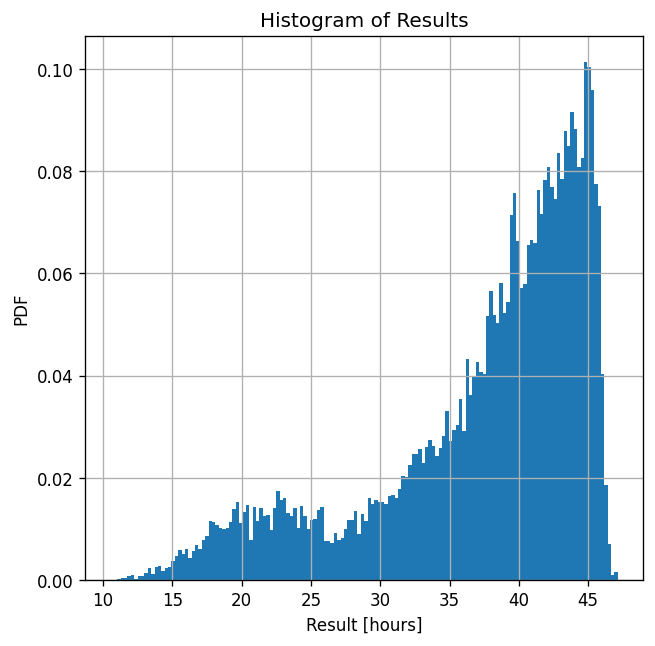

In [33]:
## Prepare the figure and axes
fig, ax = plt.subplots()

## Plot the histogram's bars
ax.bar(bins_edges[:-1], hist_values, width=bins_width, align='edge')

## Set title and axis labels
ax.set_title('Histogram of Results')
ax.set_ylabel('PDF')
ax.set_xlabel('Result [hours]');

### The hist functions in NumPy and Matplotlib
From here on we will use the NumPy function [numpy.histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) to calculate histograms and the Matplotlib function [plt.hist](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html?highlight=hist#matplotlib.axes.Axes.hist) to calculate and plot the histograms:

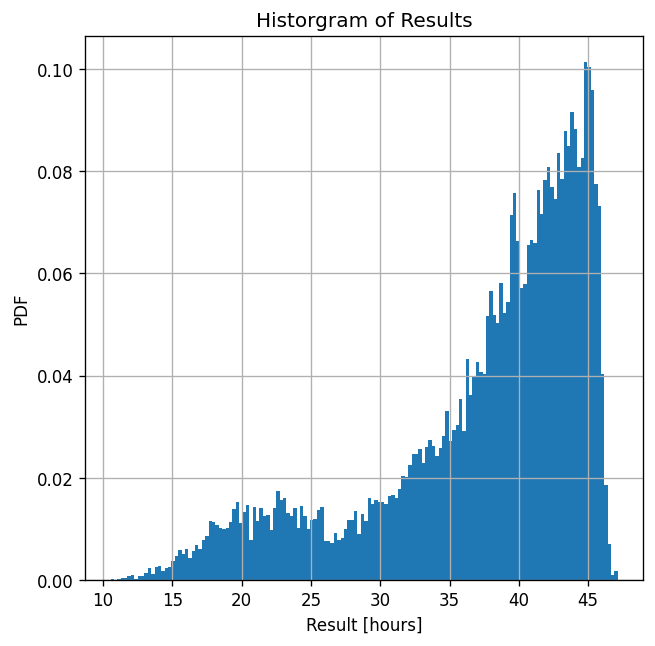

In [34]:
## Calculate and plot the histogram
fig, ax = plt.subplots()
ax.hist(results, bins=n_bins ,density=True)
ax.set_title('Historgram of Results')
ax.set_ylabel('PDF')
ax.set_xlabel('Result [hours]');

### ✍️  Indexing

Like in Matlab, we can use an array of booleans *x* to index an array *y* by *y[x]*.

Complete the following code to calculate the mean result of male runners from 2014:

In [70]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
## Fill in the following line so that indices will be a boolean array corresponding to male runners which competed in 2014
indices = ((years==2014)&(genders==0))
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

result_of_male_in_2014 = results[indices]
mean_result = np.mean(result_of_male_in_2014)
print('The mean result of male runners in 2014 is {:.2f} hours'.format(mean_result))

19516
(1468,)
The mean result of male runners in 2014 is 39.68 hours


*In the last line we have used the format function to format the output string. From here on we will be using format for that. You can read about how to use the format function [here](https://pyformat.info/)*

In [69]:
A = np.array([0,1,2,3,4,5,6])
B = np.array([0,1,2,3,4,5,6])
indices = A<4
#indices = indices[indices==True]
indices
B[indices]

array([0, 1, 2, 3])

### ✍️  Comparing Two Age Groups

Let us now compare the results of two groups of runers:

- **Group 1**: Male runners from age group 1 in 2018
- **Group 2**: Male runners from age group 3 in 2018

Complete the code bellow to extract the results of these two groups and plots their histograms:

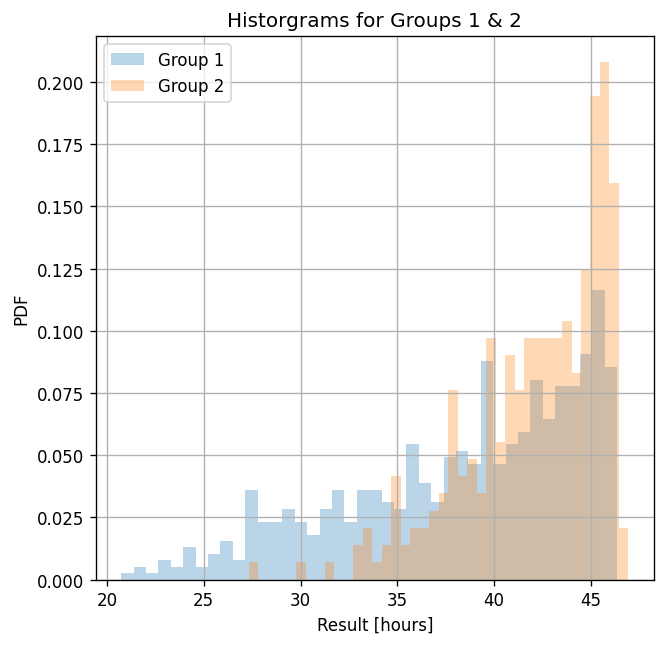

In [86]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%\
## Define the array of age groups:
age_group = dataset['Age Group'].values

## Define the indices for each group
indices1 = ((age_group==1)&(years==2018))
indices2 = ((age_group==3)&(years==2018))

## Extract the results for each group
results1 = results[indices1]
results2 = results[indices2]
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

## Calculate and plot the histograms
fig, ax = plt.subplots()
ax.hist(results1, bins=40 ,density=True, alpha=0.3, label='Group 1')
ax.hist(results2, bins=40 ,density=True, alpha=0.3, label='Group 2')
ax.set_title('Historgrams for Groups 1 & 2')
ax.set_ylabel('PDF')
ax.set_xlabel('Result [hours]');
ax.legend();

### Fitting a parametric distribution model

We will now try to fit a parametric distribution model to the results of the two age groups. We will do so using use the [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution).

The Beta distribution describes a continues distribution over the finite interval of $\left[0,1\right]$ and has the following PDF:

$$
p\left(x;a,b\right)=\frac{\Gamma\left(a+b\right)}{\Gamma\left(a\right)\Gamma\left(b\right)}x^{a-1}\left(1-x\right)^{b-1}
$$

$\Gamma$ here is the [Gamam function](https://en.wikipedia.org/wiki/Gamma_function) and is usually referred to as the extension of the factorial fuction. (since for integers inputs we get that $\Gamma\left(n\right)=\left(n-1\right)!$). The Gamma function appears in the PDFs of various known distributions and is defined as an integral over some integrand. For our needs we will only have to be able to evaluate it for different inputs, and we will do so using SciPy function [scipy.special.gamma](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html).

$a$ and $b$ are the two parameters of the distribution, which we would like to find.

#### Scaling the distribution

In our case, the results are distributed over the interval $\left[0,47\right]$, so we will have to scale the Beta distribution to fit this range. We can do so by using the following scaled PDF:

$$
p\left(x;a,b,s\right)=\frac{\Gamma\left(a+b\right)}{s\cdot\Gamma\left(a\right)\Gamma\left(b\right)}\left(x/s\right)^{a-1}\left(1-\left(x/s\right)\right)^{b-1}
$$

In our case $s=47$.

### ✍️  Plotting the Beta Distribution

Fill in the code below to define the function *calc_beta_pdf*, which calculates the Beta distribution's PDF given some $a$ and $b$.

- Use the gamma(x) to calculate $\Gamma\left(x\right)$

In [87]:
## import the gamma function from the SciPy package
from scipy.special import gamma

## Define the function calculating the PDF of the Beta distribution
def calc_beta_pdf(x, a, b, s):
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    pdf_value = (gamma(a + b) / (s*gamma(a)*gamma(b))) * (((x/s)**(a-1))*((1-(x/s))**(b-1)))
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
  
    return pdf_value

The following code plots the PDF for the following values of values of $\left(a,b\right)$:

$$
\left(0.5,0.5\right),\left(5,1\right),\left(1,3\right),\left(2,2\right),\left(2,5\right),
$$

(You are expected get an "RuntimeWarning: divide by zero" error and it is OK.)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys


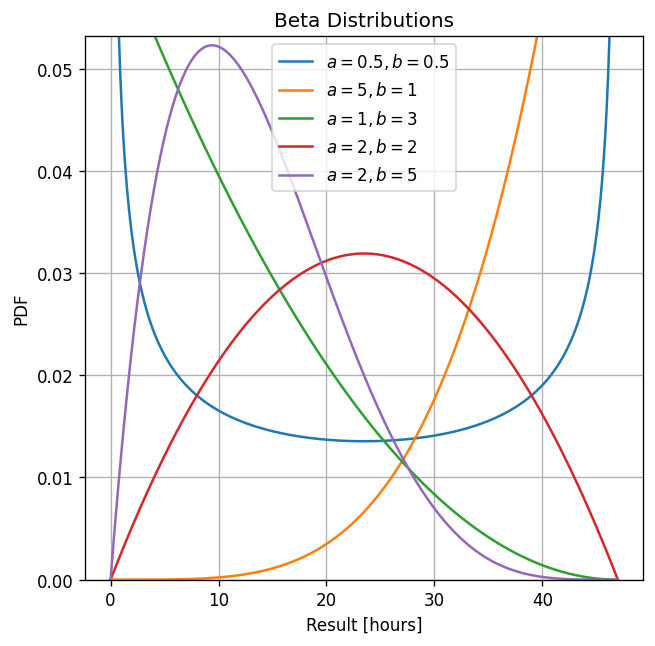

In [88]:
## Define the scale parameter s
s = 47

## Define a grid to plot the distribution over.
results_grid = np.arange(0, 47.1, 0.1)  # A grid from 0 to 47 with steps of 0.1

## Prepare the figure and axes
fig, ax = plt.subplots()

## Calculate and plot the PDF for eac hset of parameters
for a, b in [[0.5, 0.5], [5, 1], [1, 3], [2, 2], [2, 5]]:
  beta_pdf = calc_beta_pdf(results_grid, a, b, s)
  ax.plot(results_grid, beta_pdf, label='$a={},b={}$'.format(a, b))

ax.set_title('Beta Distributions')
ax.set_ylabel('PDF')
ax.set_xlabel('Result [hours]');
ax.set_ylim(0, 2.5 / s)
ax.legend();

### ✍️  Maximum Likelihood Estimation (MLE)

We will Use the MLE approach to find the optimal parameters $a^*$ and $b^*$ for fitting the beta distribution to the results of group 1 and group2.

To find the optimal parameters which minimizes the *Argmin* use a grid search, i.e., look for the optimal parameters over a selected grid by checking each and every point on the grid. Fill in the code below the define the functions performing the MLE.

- Use np.log(x) to calculate the log of x
- Use the calc_beta_pdf we have defined above to calculate the log-likelihood
- Reminder: Use np.sum(x) to calculate the sum over the array x

In [89]:
# Define the log-likelihood function
def beta_log_likelyhood(a, b, s, x):
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    ## Fill in this line to calculate the log-likelihood. x here is the array contating the data.
    log_likelyhood = - np.log(calc_beta_pdf(x, a, b, s))
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
  
    return log_likelyhood

  
# Define the function which searches for the optimal parameters a & b on a given grid
def beta_mle(a_grid, b_grid, s, x):
    optimal_a = None
    optimal_b = None
    min_value_so_far = np.inf
    for a in a_grid:
        for b in b_grid:
            ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
            current_value = np.sum(beta_log_likelyhood(a, b, s, x))
            ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
            if current_value < min_value_so_far:
                optimal_a = a
                optimal_b = b
                min_value_so_far = current_value
  
    return optimal_a, optimal_b

The following code uses the above functions to find the optimal parameters and plot the estimated PDF over the histogram

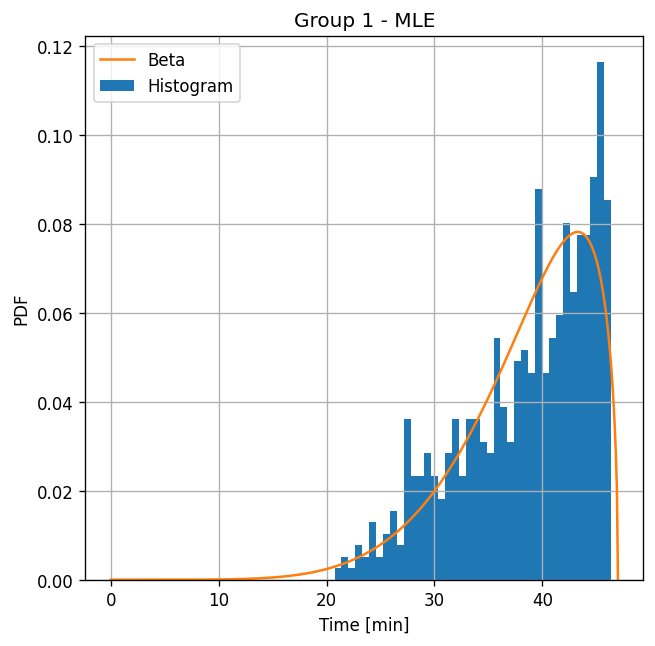

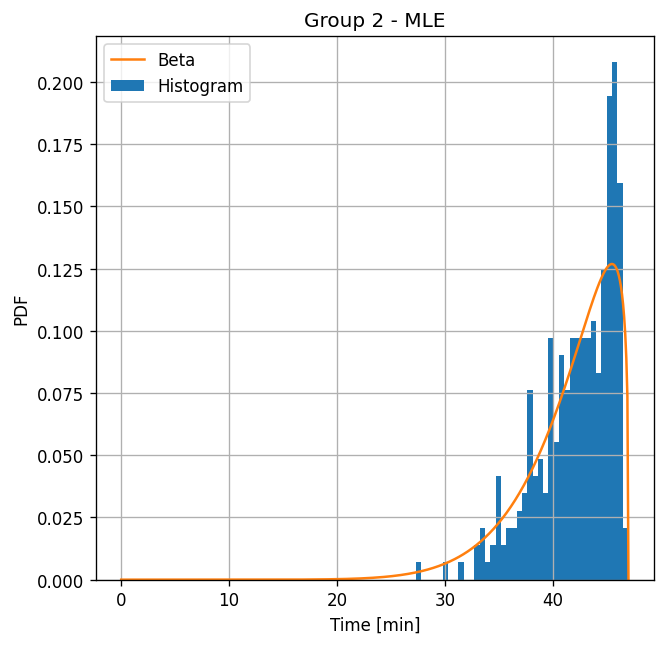

In [90]:
## Define the grid
a_grid = np.arange(0.1, 10, 0.1)
b_grid = np.arange(0.1, 10, 0.1)

## Group 1
## =======
## Find optimal MLE parameters
optimal_a1, optimal_b1 = beta_mle(a_grid, b_grid, s, results1)
## Calcualte the PDF
beta_pdf1 = calc_beta_pdf(results_grid, optimal_a1, optimal_b1, s)
## Plot the results
fig, ax = plt.subplots()
ax.hist(results1, bins=40 ,density=True, label='Histogram')
ax.plot(results_grid, beta_pdf1, label='Beta')
ax.set_title('Group 1 - MLE')
ax.set_ylabel('PDF')
ax.set_xlabel('Time [min]')
ax.legend();

## Group 2
## =======
## Find optimal MLE parameters
optimal_a2, optimal_b2 = beta_mle(a_grid, b_grid, s, results2)
## Calcualte the PDF
beta_pdf2 = calc_beta_pdf(results_grid, optimal_a2, optimal_b2, s)
## Plot the results
fig, ax = plt.subplots()
ax.hist(results2, bins=40 ,density=True, label='Histogram')
ax.plot(results_grid, beta_pdf2, label='Beta')
ax.set_title('Group 2 - MLE')
ax.set_ylabel('PDF')
ax.set_xlabel('Time [min]')
ax.legend();

### The [scipy.stats.beta](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html) model

SciPy has a set of object for working with a large range of distributions, one of them is *scipy.stats.beta*.
A distribution with a given set of parameter can by define by:
``` python
distrib = beta(a, b)
```

or with a specific scale and offset:
``` python
distrib = beta(a, b, offset, scale)
```

The *distrib* objects can now be used to calculate the PDF using *distrib.pdf*, generate random samples using *distrib.rsv* and more.
The *scipy.stats.beta* can also be used to estimate the MLE parameters given a dataset by:
``` python
a,  b, offset, scale = beta.fit(data, floc=offset, fscale=scale)
```

The following code compares our grid search calculation of the MLE parameters to SciPy's calculation.

In [91]:
## Import the beta distribution model from SciPy
from scipy.stats import beta

## Calcualte the MLE parameters for group 1 using SciPy
optimal_a1_scipy, optimal_b1_scipy, _, _ = beta.fit(results1, floc=0, fscale=s)
## The _ in the line above tells Python to ignore the 3rd and 4th outputs of beta.fit

print('Results using our function: a={:.2f}, b={:.2f}'.format(optimal_a1, optimal_b1))
print('Results using SciPy: a={:.2f}, b={:.2f}'.format(optimal_a1_scipy, optimal_b1_scipy))

Results using our function: a=6.80, b=1.50
Results using SciPy: a=6.57, b=1.45


## The Probability of Group 2 Being Better Then Group 1

We would now like to calculate the following probability:

> The probability that the result of a random runner from group 2 will be better (lower) then the result of a random runner from group 1

We would like to do so based on the two estimated probabilities we have found.

Before you start, write this probability (for yourself, not for submission) as an integral over the PDF of the joint distribution of the two results. We will calculate this integral numerically.

### The 2D grid

The following code creates a 2D grid using np.meshgrid (which is similar to Matlab's meshgrid function)

In [84]:
## Define the 2D grid of results using np.meshgrid (which is similar to Matlab's meshgrid function)
results_grid_2d_1, results_grid_2d_2 = np.meshgrid(np.arange(0, 47.1, 0.1), np.arange(0, 47.1, 0.1))

print('results_grid_2d_1:')
print(results_grid_2d_1[:5, :5])
print()
print('results_grid_2d_2:')
print(results_grid_2d_2[:5, :5])

results_grid_2d_1:
[[0.  0.1 0.2 0.3 0.4]
 [0.  0.1 0.2 0.3 0.4]
 [0.  0.1 0.2 0.3 0.4]
 [0.  0.1 0.2 0.3 0.4]
 [0.  0.1 0.2 0.3 0.4]]

results_grid_2d_2:
[[0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.1]
 [0.2 0.2 0.2 0.2 0.2]
 [0.3 0.3 0.3 0.3 0.3]
 [0.4 0.4 0.4 0.4 0.4]]


### ✍️  The joint probability

Calculate the PDF of the joint probability of the results of the two runners over the 2D grid of results.

In [94]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
## Calcualte the MLE parameters for group 2 using SciPy
optimal_a2_scipy, optimal_b2_scipy, _, _ = beta.fit(results2, floc=0, fscale=s)

## Define two SciPy beta distribution objects based on the MLE parameters calculated earlier: 
beta_dist1 = beta(optimal_a1_scipy, optimal_b1_scipy, loc=0, scale=s)
beta_dist2 = beta(optimal_a2_scipy, optimal_b2_scipy, loc=0, scale=s)

## Calculate the marginal PDF of the two results over the grid
marginal_pdf1 = beta_dist1.pdf(results_grid_2d_1)
marginal_pdf2 = beta_dist1.pdf(results_grid_2d_2)

## Calculate the joint PDF over the grid
joint_pdf = marginal_pdf1*marginal_pdf2
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

### Plotting the joint distribution

(You are expected get an "RuntimeWarning: divide by zero" error and it is OK.)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Log scale: values of z <= 0 have been masked
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Log scale: values of z <= 0 have been masked
  """
No handles with labels found to put in legend.


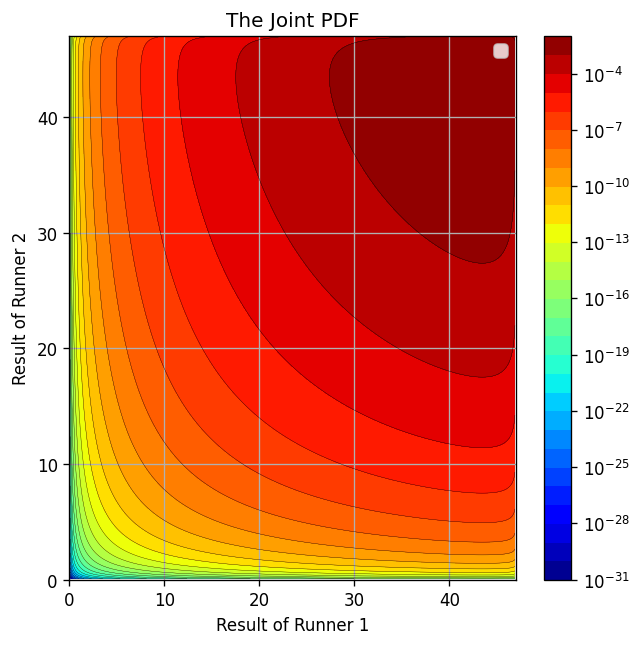

In [95]:
## Plot the joint PDF
from matplotlib import ticker  # ticker is used to select the levels of the conturs map according to a logaritmic scale
fig, ax = plt.subplots()
ax.contour(results_grid_2d_1, results_grid_2d_2, joint_pdf, locator=ticker.LogLocator(numticks=40), colors='black', linewidths=0.2)
img_obj = ax.contourf(results_grid_2d_1, results_grid_2d_2, joint_pdf, locator=ticker.LogLocator(numticks=40), cmap='jet')
plt.colorbar(img_obj);
ax.set_title('The Joint PDF')
ax.set_ylabel('Result of Runner 2')
ax.set_xlabel('Result of Runner 1')
ax.legend();

### Calculation the integral

Given a 2D grid $\left\{x_i\right\}$, $\left\{y_j\right\}$ with step sizes of $\Delta x$ and $\Delta y$ and area $S$, we can approximate the integral:

$$
\underset{S}{\int\int}f\left(x,y\right)dx_1dx_2
$$

As:

$$
\sum_{x_i,y_j\in S}f\left(x_i,y_j\right) \Delta x \Delta y
$$

✍️ Approximate the desired probability using a numerical approximation of the relevant integral over the joint probability:

In [98]:
dx1 = 0.1
dx2 = 0.1

## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
## Fill in the following line to define the points on the grid which we would like to integrate over.
## Use results_grid_2d_1 & results_grid_2d_2 to define relevat_area
relevat_area = (results_grid_2d_2 < results_grid_2d_1)
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

prob = np.sum(joint_pdf * relevat_area) * dx1 * dx2

print('The probability that the result of a random runner from group 2 will be better (lower) then the result of a random runner from group 1 is: {:.2f}'.format(prob))

The probability that the result of a random runner from group 2 will be better (lower) then the result of a random runner from group 1 is: 0.50


## Submission

To submit your code download it as a **ipynb** file from Colab, and upload it to the course's website (Moodle). You can download this code by selecting **Download .ipynb** from the **file** menu.